In [101]:
!pip install tensorflow

In [102]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO


In [103]:
url = "https://images.pexels.com/photos/2071882/pexels-photo-2071882.jpeg"

In [104]:
image = requests.get(url)

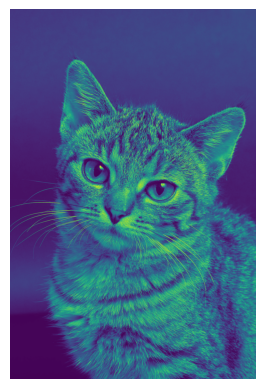

In [105]:
image_content = BytesIO(image.content)
img = Image.open(image_content).convert('L')
plt.imshow(img)
plt.axis('off')
plt.show()

In [106]:
img = np.array(img, dtype=np.float32)/255.0

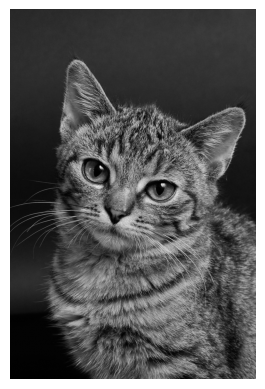

In [107]:
plt.imshow(img,cmap="gray")
plt.axis('off')
plt.show()

In [108]:
img = np.expand_dims(img,axis=-1);

In [109]:
vertical_filter = np.array([
    [1,0,-1],
    [1,0,-1],
    [1,0,-1]
],dtype=np.float32)

horizontal_filter = np.array([
    [1,1,1],
    [0,0,0],
    [-1,-1,-1]
],dtype=np.float32)

diagonal_filter1 = np.array([
    [0,-1,-2],
    [1,0,-1],
    [2,1,0]
],dtype=np.float32)

diagonal_filter2 = np.array([
    [-2,-1,0],
    [-1,0,1],
    [0,1,2]
],dtype=np.float32)


blur_filter = np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1]
],dtype=np.float32)/9.0

In [110]:
vertical_filter = vertical_filter.reshape(3,3,1,1)
horizontal_filter = horizontal_filter.reshape(3,3,1,1)
diagonal_filter1 = dialonal_filter1.reshape(3,3,1,1)
diagonal_filter2 = dialonal_filter2.reshape(3,3,1,1)
blur_filter = blur_filter.reshape(3,3,1,1)


In [111]:
vertical_edges = tf.nn.conv2d(img[None,...],vertical_filter,strides=[1,1,1,1],padding='SAME')
horizontal_edges = tf.nn.conv2d(img[None,...],horizontal_filter,strides=[1,1,1,1],padding='SAME')
diagonal_edges1 = tf.nn.conv2d(img[None,...],diagonal_filter1,strides=[1,1,1,1],padding='SAME')
diagonal_edges2 = tf.nn.conv2d(img[None,...],diagonal_filter2,strides=[1,1,1,1],padding='SAME')
blur = tf.nn.conv2d(img[None,...],blur_filter,strides=[1,1,1,1],padding='SAME')

In [112]:
vertical_edges = vertical_edges.numpy().squeeze()
horizontal_edges = horizontal_edges.numpy().squeeze()
diagonal_edges1 = diagonal_edges1.numpy().squeeze()
diagonal_edges2 = diagonal_edges2.numpy().squeeze()
blur = blur.numpy().squeeze()

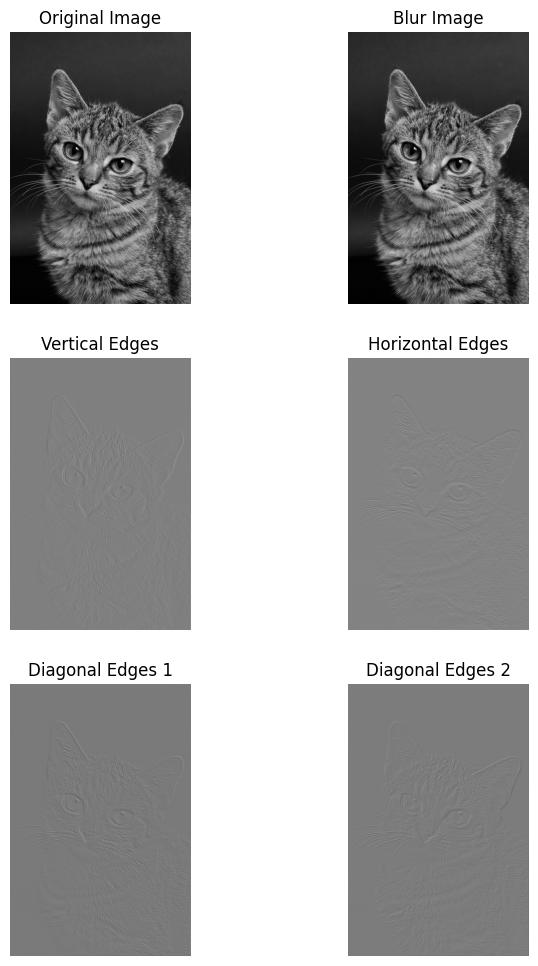

In [113]:

plt.figure(figsize=(8,12))
plt.subplot(3,2,1)
plt.imshow(img.squeeze(),cmap="gray")
plt.title("Original Image")
plt.axis('off')

plt.subplot(3,2,2)
plt.imshow(blur,cmap="gray")
plt.title("Blur Image")
plt.axis('off')

plt.subplot(3,2,3)
plt.imshow(vertical_edges,cmap="gray")
plt.title("Vertical Edges")
plt.axis('off')

plt.subplot(3,2,4)
plt.imshow(horizontal_edges,cmap="gray")
plt.title("Horizontal Edges")
plt.axis('off')

plt.subplot(3,2,5)
plt.imshow(dialonal_edges1,cmap="gray")
plt.title("Diagonal Edges 1")
plt.axis('off')



plt.subplot(3,2,6)
plt.imshow(diagonal_edges2,cmap="gray")
plt.title("Diagonal Edges 2")
plt.axis('off')

plt.show()